# **Traffic Signs Detection Using YOLOv5**

In [ ]:
!pip install ultralytics

In [ ]:
from ultralytics import YOLO

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

**1. Cloning The YOLOv5 repository (Do this part only once)**

In [1]:
#clone YOLOv5
!git clone https://github.com/ultralytics/yolov5

# Change the current working directory.
%cd yolov5 
# !pip install -qr requirements.txt # install dependencies from requirements to use Yolov5 with quiet option

**2. Import Required Libraries**

In [2]:
import shutil
import os
from random import choice

import torch
import os
from IPython.display import Image  # to display images

**4-Check dataset**

In [18]:
# Checking the size of images and displaying them
import numpy as np
import cv2

# Image shape in Training
image = cv2.imread('../datasets2/images/train/000000_jpg.rf.f5cdeb1d42af45544aab1ea09ef16f06.jpg')
height = np.size(image, 0)
width = np.size(image, 1)
print ("shape of the training image {}, {}".format(height, width))

# Image shape in validation
image = cv2.imread('../datasets2/images/val/000005_jpg.rf.7167fa1b297af372e18ac97e131acd9c.jpg')
height = np.size(image, 0)
width = np.size(image, 1)
print ("shape of the validation image {}, {}".format(height, width))

shape of the training image 416, 416
shape of the validation image 416, 416


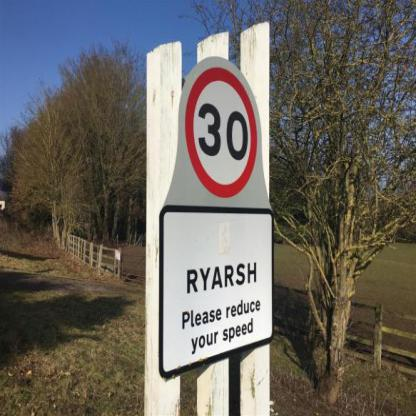

In [24]:
# dispying with different width
Image(filename='../datasets2/images/train/000000_jpg.rf.f5cdeb1d42af45544aab1ea09ef16f06.jpg', width=416) 

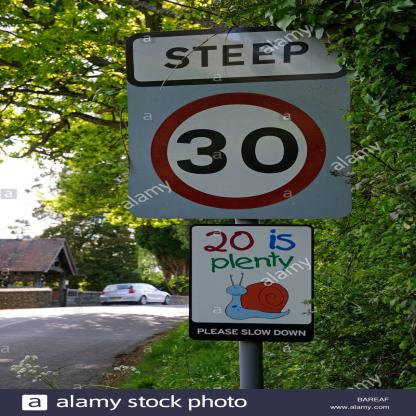

In [25]:
# dispying with different width
Image(filename='../datasets2/images/val/000005_jpg.rf.7167fa1b297af372e18ac97e131acd9c.jpg', width=416) 

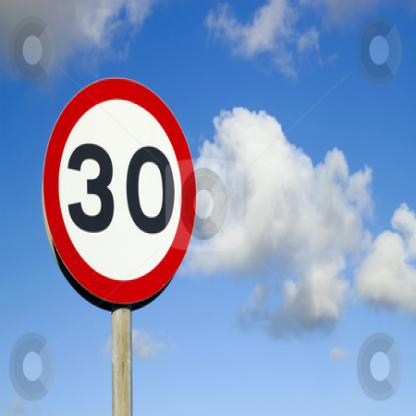

In [26]:
# dispying with different width
Image(filename='../datasets2/images/val/000033_jpg.rf.536b11b500151ba8537d44d70e1a3e64.jpg', width=416)

**5. Create traffic_sign_data.yaml (dataset config file)**

"traffic sign data" is a small dataset composed of the first 374 images in train and 88 images in validation set. 

data/traffic_sign_data.yaml, created below, is the dataset config file that defines:

1) the dataset root directory path and relative paths to train / val / test image directories (or *.txt files with image paths)

2) nc: the number of classes

3) names: a list of class names

In [27]:
import yaml

result = {
    "train": f"../datasets2/images/train", # train images 
    "val": f"../datasets2/images/val",     # val images 
    "nc": 25,                              # number of classes
    "names": ['Bend_to_left', 'Bend_to_right', 'Double_bend_left', 'Double_bend_right', 'Fork_road', 'Narrow_road', 'No_entry', 'No_left_turn', 'No_right_turn', 'No_u_turn', 'Speed_limit_100km', 'Speed_limit_110km', 'Speed_limit_120km', 'Speed_limit_30km', 'Speed_limit_40km', 'Speed_limit_50km', 'Speed_limit_60km', 'Speed_limit_70km', 'Speed_limit_80km', 'Speed_limit_90km', 'Traffic_light_green', 'Traffic_light_red', 'car', 'motorcycle', 'person'],  # class names
}
with open("./data/traffic_sign_data.yaml", "w") as f:
    dump = yaml.dump(result, default_flow_style=False)
    f.write(dump)

**6. Training Our Custom Traffic Sign Detector Model**

training a YOLOv5s model on traffic sign data by specifying dataset, batch-size, image size and pretrained --weights yolov5s.pt. 
Pretrained weights are auto-downloaded from the latest YOLOv5 release.

Parameters:

–data: Path to the data configuration file

--weights: specify a path to weights to start transfer learning from. yolov5s.pt (starting from Pretrained weights)

–img: Input image size

–batch: Size of a batch (model weights are updated with each batch).

–epochs: No of epochs.

--cache: cache images for faster training, cache images in "ram" (default) or "disk

In [28]:
# Training YOLOv5s on traffic sign dataset for 90 epochs
!python train.py --img 416 --batch 9 --epochs 90 --data traffic_sign_data.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=traffic_sign_data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=90, batch_size=9, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=0,1,3, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: skipping check (offline), for updates see https://github.com/ultralytics/yolov5
YOLOv5 🚀 v7.0-134-g23c4923 Python-3.9.16 torch-1.13.1+cu117 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11012MiB)
                                                             CUDA:1 (NVIDIA GeForce RTX 2080 Ti, 11012MiB)
                                                             CUDA:3 (NVIDIA GeForce RTX 2080 Ti, 1

All training results are saved to runs/train/ with incrementing run directories, i.e. runs/train/exp2, runs/train/exp3 etc.

**7-Local Logging:**

All results are logged by default to runs/train, with a new experiment directory created for each new training as runs/train/exp2, runs/train/exp3, etc. View train and val jpgs to see mosaics, labels, predictions and augmentation effects. Note an Ultralytics Mosaic Dataloader is used for training (shown below), which combines 4 images into 1 mosaic during training.

val_batch0_labels.jpg shows validation batch 0 mosaics and labels:

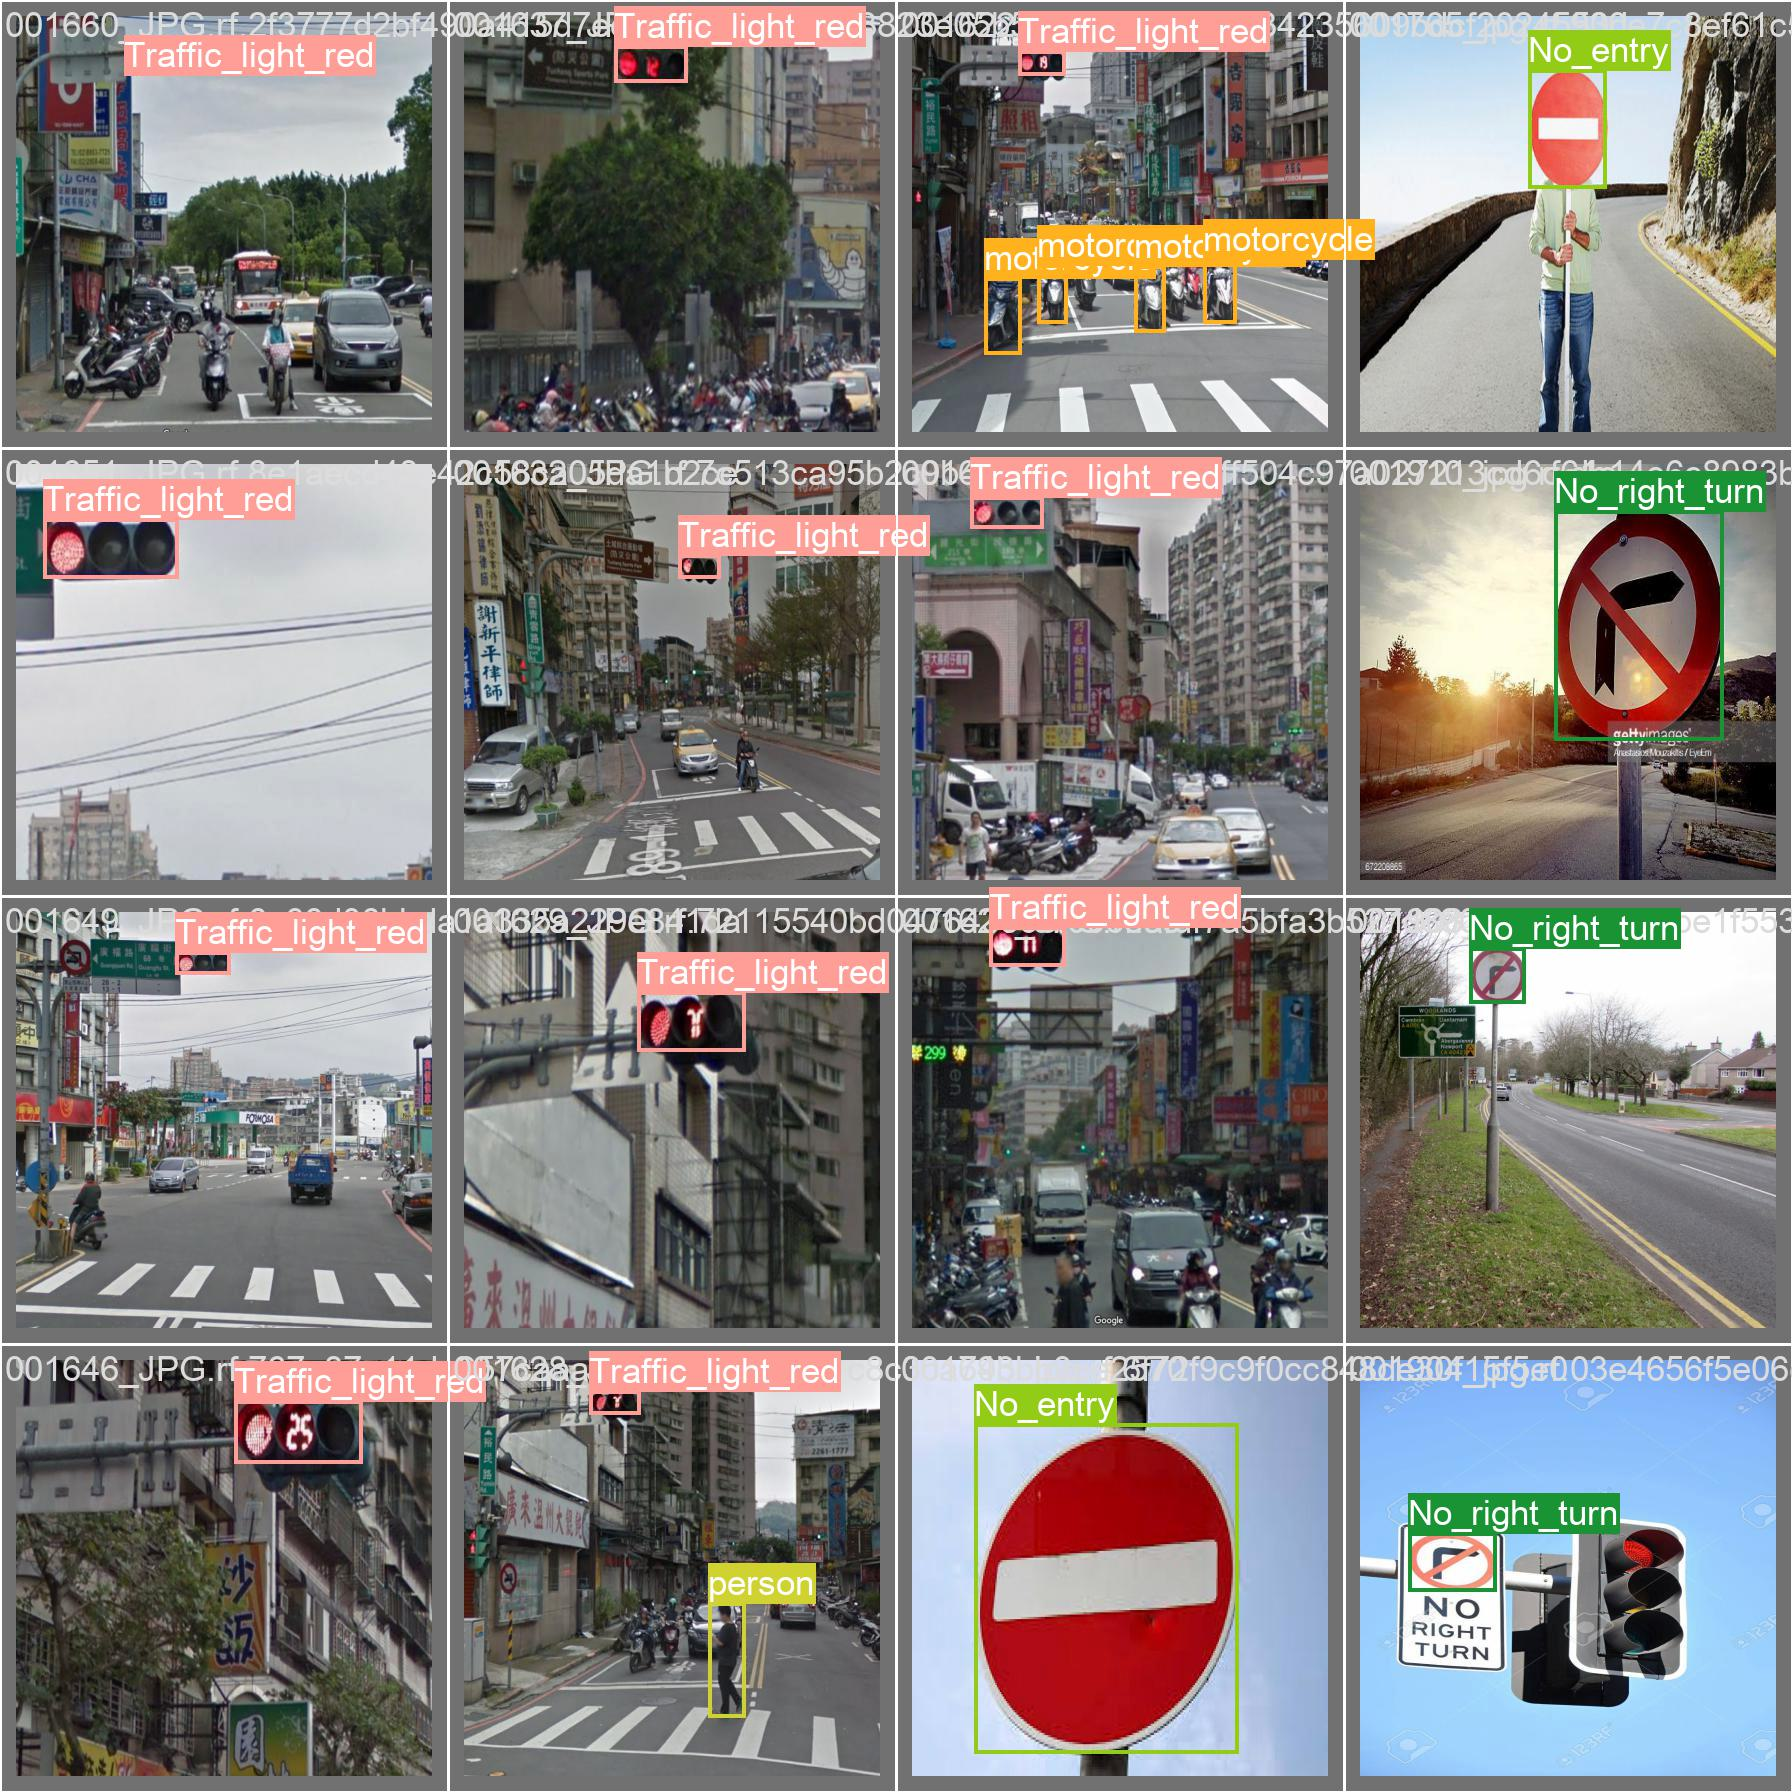

In [29]:
# Image(filename='/content/yolov5/runs/train/exp/train_batch0.jpg', width=800)  # train batch 0 mosaics and labels
Image(filename='./runs/train/exp/val_batch1_labels.jpg', width=800)  # test batch 0 labels
# Image(filename='/content/yolov5/runs/train/exp/val_batch0_pred.jpg', width=800)  # test batch 0 predictions

Training losses and performance metrics are also logged to Tensorboard and a custom results.txt logfile which is plotted as results.png (below) after training completes.

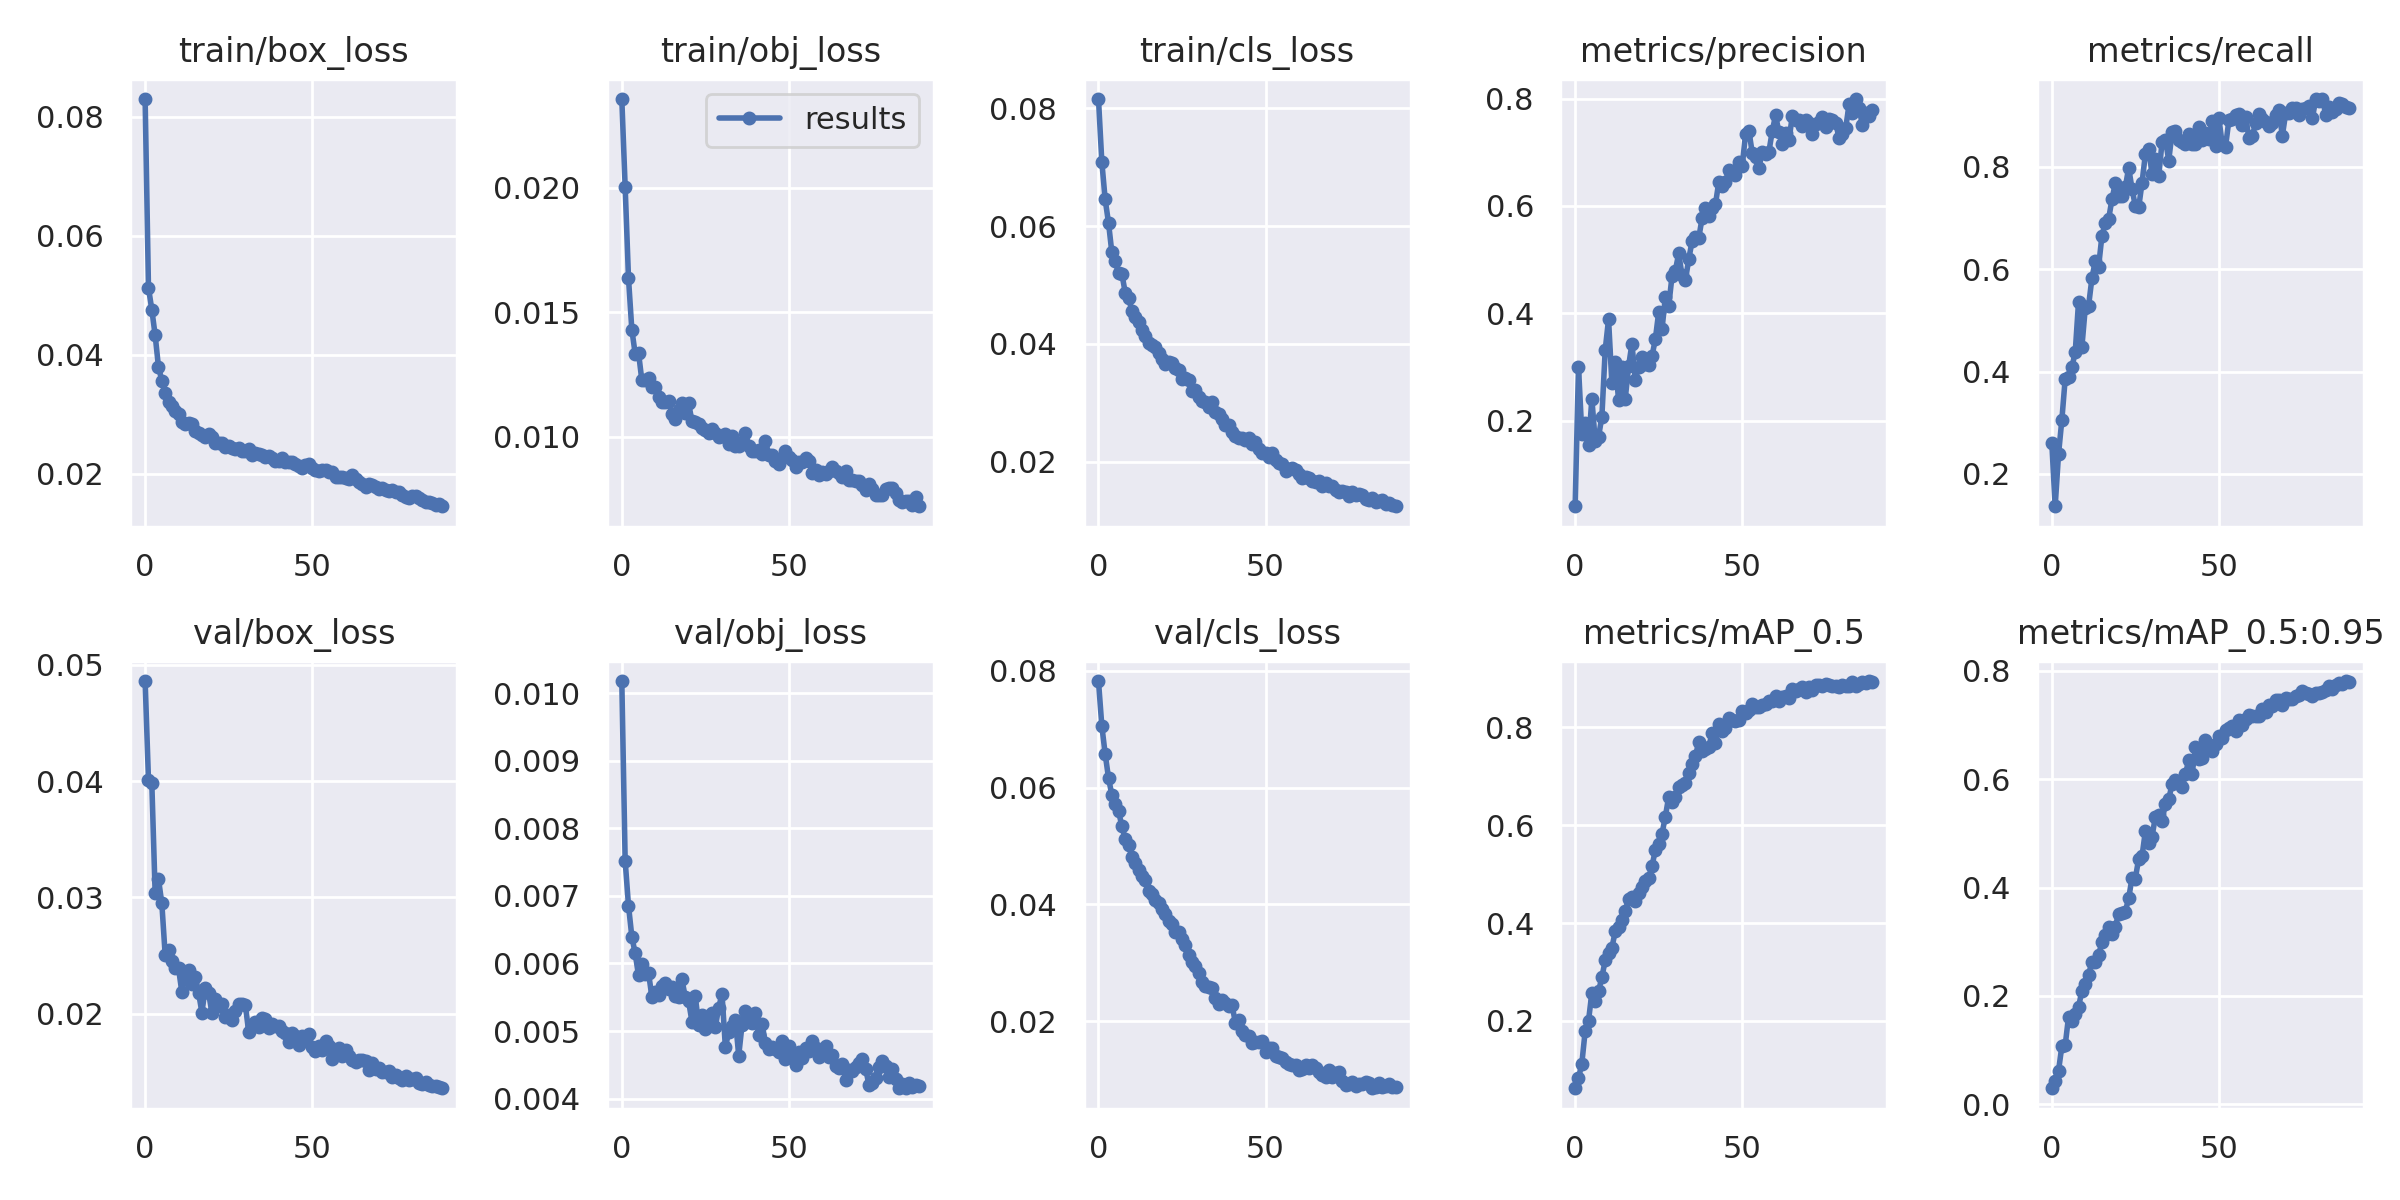

In [30]:
Image(filename='./runs/train/exp/results.png', width=800)

 **6. Run Inference With Custom YOLOv5 Object Detector Trained Weights**

Inference Command: Run the ‘detect.py’ file to run inference on the custom dataset.

–source: The path to the image to perform inference on.

–weights: Weights file of the trained model.


–conf: Minimum confidence value to consider a prediction as good.

–save-txt: Flag parameters enables saving of text files containing the coordinates of bounding boxes.

**Inference on Images:**

In [37]:
!python detect.py --source ../datasets2/images/test/000004_jpg.rf.9b908cec2bc4c2795bb0e3e67c119ec3.jpg --weights runs/train/exp/weights/best.pt --conf 0.25 --save-txt

detect: weights=['runs/train/exp/weights/best.pt'], source=../datasets2/images/test/000004_jpg.rf.9b908cec2bc4c2795bb0e3e67c119ec3.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-134-g23c4923 Python-3.9.16 torch-1.13.1+cu117 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11012MiB)

Fusing layers... 
Model summary: 157 layers, 7077550 parameters, 0 gradients, 16.0 GFLOPs
image 1/1 /u1/users/mek651/YOLOv5/Traffic-Sign-Detection-Using-Yolov5_V2/datasets2/images/test/000004_jpg.rf.9b908cec2bc4c2795bb0e3e67c119ec3.jpg: 640x640 1 Speed_limit_30km, 6.3ms
Speed: 0.4ms pre-process, 6.3ms inference, 1.1ms NMS per image at shape (1, 3, 640, 640)
Res

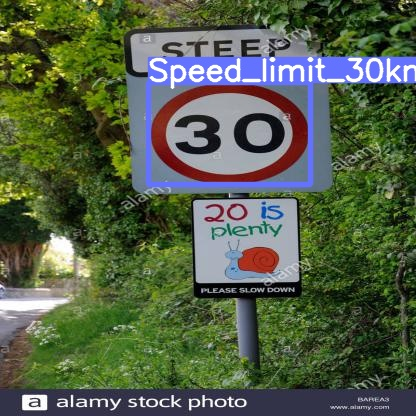

In [38]:
Image(filename='./runs/detect/exp/000004_jpg.rf.9b908cec2bc4c2795bb0e3e67c119ec3.jpg', width=800)

In [39]:
!python detect.py --source ../datasets2/images/test/000122_jpg.rf.8a8555c5be1afa9eef15f00b5fbe5581.jpg --weights runs/train/exp/weights/best.pt --conf 0.25 --save-txt

detect: weights=['runs/train/exp/weights/best.pt'], source=../datasets2/images/test/000122_jpg.rf.8a8555c5be1afa9eef15f00b5fbe5581.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-134-g23c4923 Python-3.9.16 torch-1.13.1+cu117 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11012MiB)

Fusing layers... 
Model summary: 157 layers, 7077550 parameters, 0 gradients, 16.0 GFLOPs
image 1/1 /u1/users/mek651/YOLOv5/Traffic-Sign-Detection-Using-Yolov5_V2/datasets2/images/test/000122_jpg.rf.8a8555c5be1afa9eef15f00b5fbe5581.jpg: 640x640 1 Speed_limit_50km, 6.3ms
Speed: 0.3ms pre-process, 6.3ms inference, 1.1ms NMS per image at shape (1, 3, 640, 640)
Res

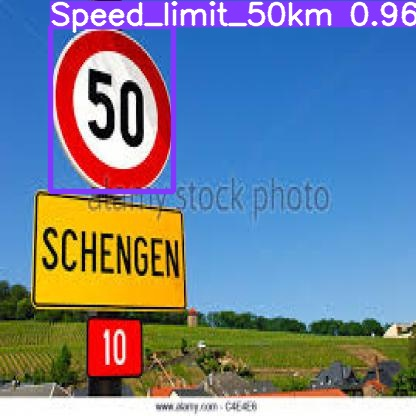

In [40]:
Image(filename='./runs/detect/exp2/000122_jpg.rf.8a8555c5be1afa9eef15f00b5fbe5581.jpg', width=800)

In [41]:
# dispying with different width
!python detect.py --source ../datasets2/images/test/000130_jpg.rf.ea6f09f17302424972c10ab7a5476cbb.jpg --weights runs/train/exp/weights/best.pt --conf 0.25 --save-txt

detect: weights=['runs/train/exp/weights/best.pt'], source=../datasets2/images/test/000130_jpg.rf.ea6f09f17302424972c10ab7a5476cbb.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-134-g23c4923 Python-3.9.16 torch-1.13.1+cu117 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11012MiB)

Fusing layers... 
Model summary: 157 layers, 7077550 parameters, 0 gradients, 16.0 GFLOPs
image 1/1 /u1/users/mek651/YOLOv5/Traffic-Sign-Detection-Using-Yolov5_V2/datasets2/images/test/000130_jpg.rf.ea6f09f17302424972c10ab7a5476cbb.jpg: 640x640 1 Speed_limit_50km, 6.3ms
Speed: 0.3ms pre-process, 6.3ms inference, 1.1ms NMS per image at shape (1, 3, 640, 640)
Res

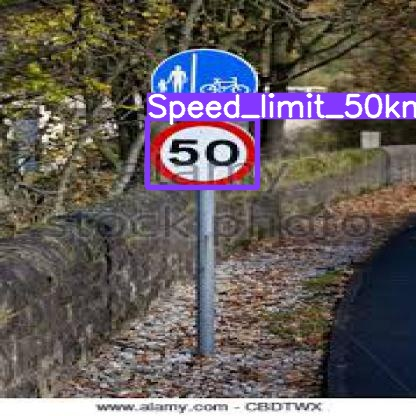

In [42]:
Image(filename='./runs/detect/exp3/000130_jpg.rf.ea6f09f17302424972c10ab7a5476cbb.jpg', width=800)

In [ ]:
!python detect.py --source /content/Day.mov --weights runs/train/exp/weights/best.pt --conf 0.25 --save-txt